In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [108]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [109]:
corr = df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


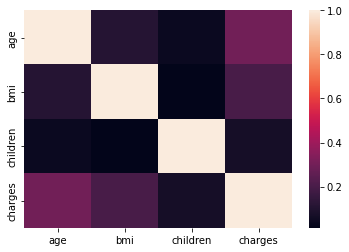

In [110]:
sns.heatmap(data=corr)

In [111]:
x = df[['age','sex','bmi','children','smoker','region']]
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [112]:
x = pd.get_dummies(data=x, drop_first=True)
x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [113]:
y = df[['charges']]
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [114]:
y = y.values
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [115]:
cols_to_norm = ['age','bmi', 'children']
x[cols_to_norm] = x[cols_to_norm].apply(lambda x: (x - x.mean()) / x.std())
x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438227,-0.453151,-0.908274,0,1,0,0,1
1,-1.509401,0.509431,-0.078738,1,0,0,1,0
2,-0.797655,0.383164,1.580335,1,0,0,1,0
3,-0.441782,-1.305043,-0.908274,1,0,1,0,0
4,-0.512957,-0.292447,-0.908274,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0.768185,0.050278,1.580335,1,0,1,0,0
1334,-1.509401,0.206062,-0.908274,0,0,0,0,0
1335,-1.509401,1.014499,-0.908274,0,0,0,1,0
1336,-1.295877,-0.797515,-0.908274,0,0,0,0,1


In [116]:
x = x.values
x

array([[-1.4382265 , -0.45315057, -0.90827406, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50940108,  0.50943062, -0.07873775, ...,  0.        ,
         1.        ,  0.        ],
       [-0.7976553 ,  0.38316358,  1.58033487, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50940108,  1.01449877, -0.90827406, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29587735, -0.79751522, -0.90827406, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55110577, -0.26129026, -0.90827406, ...,  1.        ,
         0.        ,  0.        ]])

In [117]:
x.shape

(1338, 8)

In [118]:
x_train, x_, y_train, y_ = train_test_split(x, y , test_size = 0.2)

In [119]:
x_val, x_test, y_val, y_test = train_test_split(x_, y_, test_size = 0.5)

In [121]:
input_layer = layers.Input(shape = (8,) )

In [122]:
hypothesis = layers.Dense(1, activation=None)(input_layer)

In [123]:
model = keras.Model(inputs = input_layer, outputs = hypothesis)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


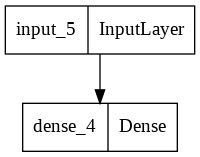

In [124]:
tf.keras.utils.plot_model(model)

In [125]:
model.compile(optimizer= tf.keras.optimizers.SGD(learning_rate = 0.005), loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [126]:
earlyStop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20, restore_best_weights=True)

In [127]:
history = model.fit(x = x_train, y = y_train, batch_size = 1339, epochs = 5000, callbacks = [earlyStop] , validation_data = (x_val, y_val))

Epoch 1/5000
1/1 [==============================] - 0s 411ms/step - loss: 334746944.0000 - root_mean_squared_error: 18296.0918 - val_loss: 247845344.0000 - val_root_mean_squared_error: 15743.1045
Epoch 2/5000
1/1 [==============================] - 0s 29ms/step - loss: 328030080.0000 - root_mean_squared_error: 18111.6016 - val_loss: 242279568.0000 - val_root_mean_squared_error: 15565.3320
Epoch 3/5000
1/1 [==============================] - 0s 26ms/step - loss: 321510944.0000 - root_mean_squared_error: 17930.7266 - val_loss: 236889552.0000 - val_root_mean_squared_error: 15391.2168
Epoch 4/5000
1/1 [==============================] - 0s 26ms/step - loss: 315183680.0000 - root_mean_squared_error: 17753.4141 - val_loss: 231669696.0000 - val_root_mean_squared_error: 15220.6992
Epoch 5/5000
1/1 [==============================] - 0s 24ms/step - loss: 309042336.0000 - root_mean_squared_error: 17579.5996 - val_loss: 226614624.0000 - val_root_mean_squared_error: 15053.7246
Epoch 6/5000
1/1 [======

In [128]:
model.save('model.h5')

In [129]:
model.save_weights('weight.h5')

In [130]:
y_predicted = model.predict(x_test)
y_predicted

array([[ 2867.9214 ],
       [ 6672.2188 ],
       [ 1366.0361 ],
       [ 4320.885  ],
       [11203.027  ],
       [11713.174  ],
       [ 3086.234  ],
       [ 4595.6387 ],
       [ 7963.525  ],
       [ 9780.243  ],
       [ 7550.8984 ],
       [ 8698.242  ],
       [11885.311  ],
       [ 7008.7637 ],
       [ 9813.213  ],
       [ 3507.5015 ],
       [11759.796  ],
       [ 3843.6484 ],
       [27808.488  ],
       [16097.661  ],
       [ 9696.43   ],
       [16379.597  ],
       [15004.996  ],
       [ 9525.808  ],
       [15706.827  ],
       [28450.426  ],
       [ 8209.003  ],
       [13095.726  ],
       [11495.473  ],
       [ 9420.516  ],
       [26763.152  ],
       [12104.727  ],
       [34568.05   ],
       [32259.68   ],
       [17247.     ],
       [11511.354  ],
       [30660.45   ],
       [ 7472.5527 ],
       [ 8336.489  ],
       [ 1940.7593 ],
       [ 7404.212  ],
       [ 7669.9663 ],
       [14551.578  ],
       [ 3982.292  ],
       [15718.799  ],
       [ 3

In [131]:
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
rmse

5601.349766869437

In [132]:
model.get_weights()

[array([[ 3682.16    ],
        [ 1950.4833  ],
        [  695.5452  ],
        [  298.85257 ],
        [23088.855   ],
        [  292.12573 ],
        [  -94.624756],
        [ -163.95705 ]], dtype=float32), array([8478.905], dtype=float32)]